In [ ]:
import pandas as pd

In [8]:
import pandas as pd

# Define the file path
file_path = '/Users/chrisalleyne/Desktop/Online Retail.xlsx'

# Load the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


Top 10 Stock Codes by Sales Volume:
Index(['DOT', 22423, 47566, '85123A', '85099B', 23084, 'POST', 22086, 84879,
       79321],
      dtype='object', name='StockCode')


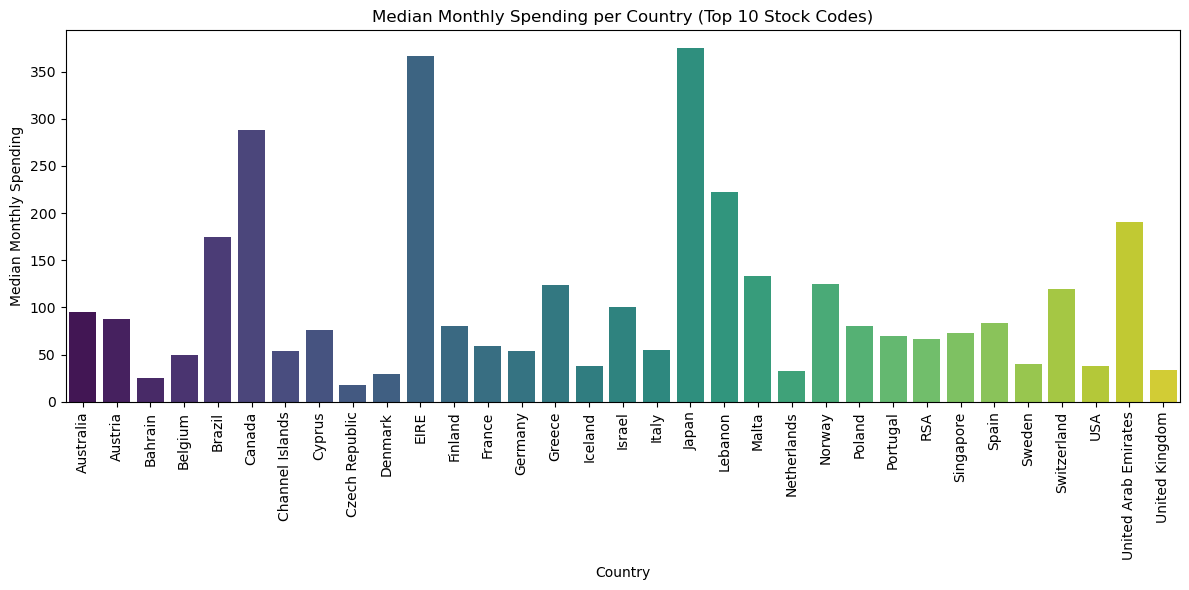

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/Users/chrisalleyne/Desktop/Online Retail.xlsx'
online_retail = pd.read_excel(file_path)

# Convert the date column to datetime format
online_retail['InvoiceDate'] = pd.to_datetime(online_retail['InvoiceDate'])

# Add the day of the week and month columns
online_retail['Day of the Week'] = online_retail['InvoiceDate'].dt.day_name()
online_retail['Month'] = online_retail['InvoiceDate'].dt.month_name()

# Separate Date and Time
online_retail['InvoiceTime'] = online_retail['InvoiceDate'].dt.time
online_retail['InvoiceDate'] = online_retail['InvoiceDate'].dt.date

# Add Cancel column to identify if invoice has been cancelled
online_retail['Cancelled'] = online_retail['InvoiceNo'].astype(str).str.startswith('C')

# Drop rows with missing 'Country'
online_retail.dropna(subset=['Country'], inplace=True)

# Drop 'Unspecified' and 'European Community'
online_retail = online_retail[~online_retail['Country'].isin(['Unspecified', 'European Community'])]

# Drop 'Description' column
online_retail.drop('Description', axis='columns', inplace=True)

# Add a Total column
online_retail['Total'] = online_retail['UnitPrice'] * online_retail['Quantity']

# Find the top 10 stock codes by sales volume
top_10_stock_codes = online_retail.groupby('StockCode')['Total'].sum().nlargest(10).index
top_10_data = online_retail[online_retail['StockCode'].isin(top_10_stock_codes)]

# Display the top 10 stock codes
print("Top 10 Stock Codes by Sales Volume:")
print(top_10_stock_codes)

# Visualization: Median Monthly Spending per Country for Top 10 Stock Codes
monthly_spending = top_10_data.groupby(['CustomerID', 'Month', 'Country'])['Total'].sum().reset_index()
median_spending = monthly_spending.groupby('Country')['Total'].median().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Total', data=median_spending, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Median Monthly Spending')
plt.title('Median Monthly Spending per Country (Top 10 Stock Codes)')
plt.tight_layout()
plt.show()